In [4]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

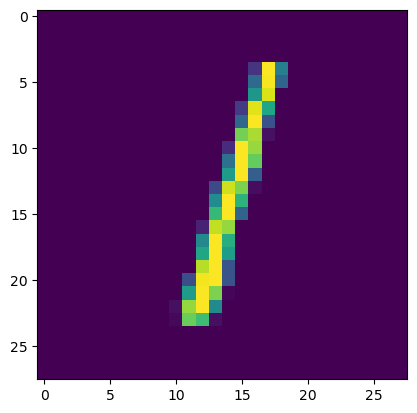

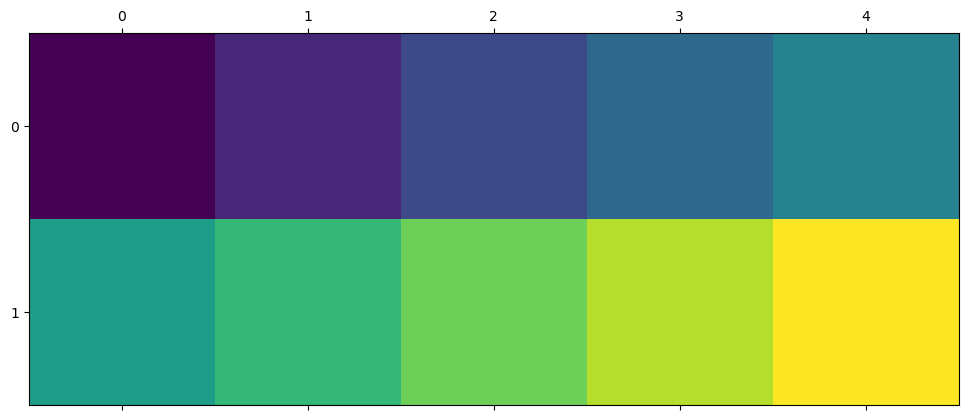

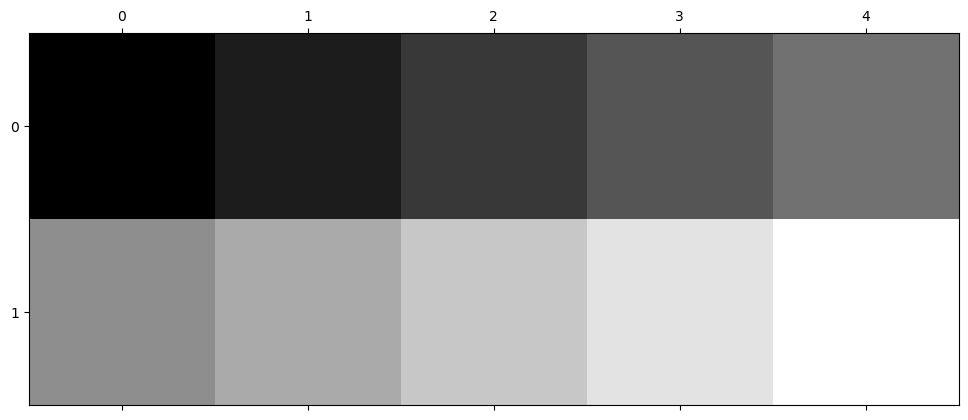

In [7]:
plt.imshow(x_test[2])

plt.matshow(np.arange(10,101,10).reshape(2,5))
plt.matshow(np.arange(10,101,10).reshape(2,5),cmap='gray')

In [29]:
y_test[2]

1

In [31]:
x_train, x_test=x_train/255.0, x_test/255.0

In [33]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9892 - loss: 0.0344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9939 - loss: 0.0206
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9949 - loss: 0.0169
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9959 - loss: 0.0147


In [39]:
test_loss, test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.0863  
Test accuracy: 97.76%


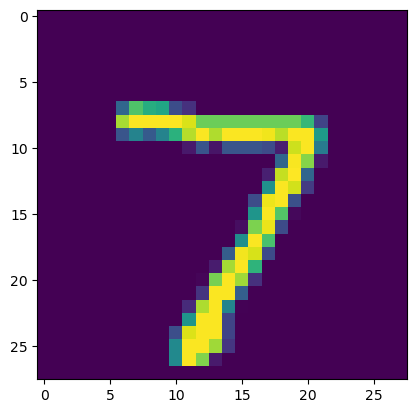

In [41]:
plt.imshow(x_test[0])

In [43]:
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape - ', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
[[3.3335155e-09 1.3605779e-09 1.0198454e-05 ... 9.9998391e-01
  2.0927318e-09 6.2450459e-07]
 [1.6841493e-09 1.4689554e-05 9.9998295e-01 ... 8.5605676e-13
  2.0894247e-06 2.3964376e-12]
 [2.4306818e-08 9.9985492e-01 6.8672007e-06 ... 5.3095606e-05
  6.0126549e-05 7.9804136e-07]
 ...
 [7.1855607e-13 1.4246808e-09 3.1529251e-11 ... 7.7484565e-06
  3.2542002e-06 2.1515443e-05]
 [8.0497003e-08 3.7674162e-09 2.4778686e-08 ... 2.0460692e-07
  2.9784377e-04 7.0026193e-11]
 [4.4093258e-09 7.8738233e-10 2.4079050e-08 ... 8.3625923e-14
  2.9658227e-11 3.4592300e-13]]
Predictions Shape -  (10000, 10)


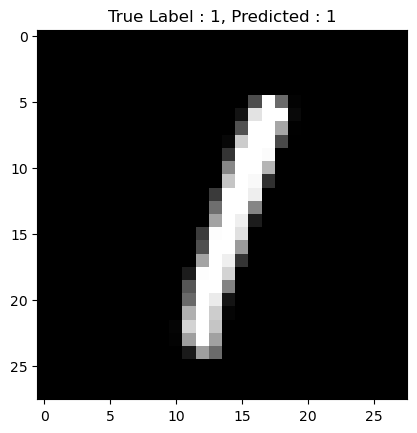

In [45]:
plt.imshow(x_test[5], cmap='gray')
plt.title(f"True Label : {y_test[5]}, Predicted : {np.argmax(predictions[5])}")
plt.show()

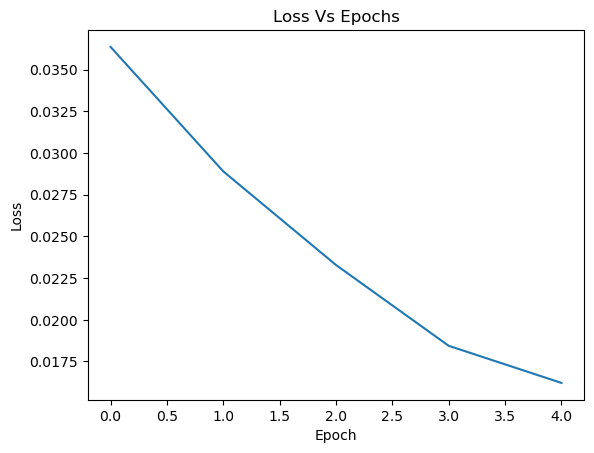

In [51]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
plt.show()

In [73]:
####### FUNCTIONAL API####################
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the two inputs
numerical_input = layers.Input(shape=(3,))  # 3 numerical features (e.g., age, income, etc.)
image_input = layers.Input(shape=(28, 28, 1))  # 28x28 grayscale image

# Process numerical input through a dense layer
x1 = layers.Dense(32, activation='relu')(numerical_input)

# Process image input through convolutional layers
x2 = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x2 = layers.MaxPooling2D((2, 2))(x2)
x2 = layers.Flatten()(x2)

# Merge the two processed inputs
merged = layers.concatenate([x1, x2])

# Add a dense layer after merging
x = layers.Dense(64, activation='relu')(merged)

# Output layer with one neuron (binary classification example)
output = layers.Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=[numerical_input, image_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 28, 28, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 26, 26, 32)        │             320 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 32)                │             128 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 5408)              │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 5440)              │               0 │ dense_2[0][0],             │
│                               │                           │                 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 64)                │         348,224 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │              65 │ dense_3[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 348,737 (1.33 MB)

 Trainable params: 348,737 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
####### Subclassing API######################
import tensorflow as tf
from tensorflow.keras import layers

# Custom model by subclassing tf.keras.Model
class CustomNN(tf.keras.Model):
    def __init__(self):
        super(CustomNN, self).__init__()
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(64, activation='relu')
        self.output_layer = layers.Dense(10, activation='softmax')  # 10 classes for classification
    
    def call(self, inputs):
        # Custom forward pass: applying layers sequentially
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)

# Create an instance of the custom model
model = CustomNN()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "custom_nn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)